In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from seaborn_qqplot import pplot

In [39]:
df = pd.read_csv(r"C:\Users\jiyoo\workspace\project1\df1.csv", index_col = 0)
df.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5


In [40]:
print( df.columns ) 

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol',
       'lifespan', 'sugar'],
      dtype='object')


In [41]:
A = df[['exercise','lifespan']]
A.tail()

,exercise,lifespan
4091,3.7,80.7
4092,3.6,71.1
4093,2.7,90.0
4094,2.3,75.9
4095,1.2,96.9


In [42]:
df = df.dropna()

In [43]:
print(df.head())
print ()
print (df.info())

   genetic  length   mass  exercise  smoking  alcohol  lifespan  sugar
0     73.9   185.0   99.7       0.9      0.0      2.4      73.1    6.9
1     86.0   172.0  105.4       1.8      8.1      0.4      85.0    4.2
2     83.3   176.0  111.4       1.1      0.8      4.6      81.6    7.5
3     82.8   164.0  111.4       4.7     11.8      1.0      81.0    2.9
4     78.7   178.0   71.6       1.5      8.3      4.9      75.0    5.5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4084 non-null   float64
 1   length    4084 non-null   float64
 2   mass      4084 non-null   float64
 3   exercise  4084 non-null   float64
 4   smoking   4084 non-null   float64
 5   alcohol   4084 non-null   float64
 6   lifespan  4084 non-null   float64
 7   sugar     4084 non-null   float64
dtypes: float64(8)
memory usage: 287.2 KB
None


In [44]:
df.drop_duplicates()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5
...,...,...,...,...,...,...,...,...
4091,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8
4092,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6
4093,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6
4094,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2


In [50]:
# New Feature BMI (kg/m^2)
df['bmi'] = df['mass']/(df['length']/100)**2
df.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.130752
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.627366
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,35.963326
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.418798
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.598157


In [51]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.216389,183.880889,92.155161,2.396672,9.809035,2.266846,80.129810,6.475805,27.641830
std,6.929577,12.549328,25.503372,1.154459,6.918614,1.801044,7.461525,2.681427,8.611238
min,68.628624,156.885162,50.000000,0.100000,0.000000,0.000000,64.877693,0.700000,11.332833
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,75.000000,4.400000,20.956596
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,79.700000,6.300000,26.487329
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,85.200000,8.400000,33.226561
max,95.928624,210.885162,151.300930,4.953477,22.200000,6.000000,95.477693,12.487169,61.472073


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4084 non-null   float64
 1   length    4084 non-null   float64
 2   mass      4084 non-null   float64
 3   exercise  4084 non-null   float64
 4   smoking   4084 non-null   float64
 5   alcohol   4084 non-null   float64
 6   lifespan  4084 non-null   float64
 7   sugar     4084 non-null   float64
 8   bmi       4084 non-null   float64
dtypes: float64(9)
memory usage: 319.1 KB


In [53]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

IQR=Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

mean = df.mean()
df = df.clip(lower=mean-1.5*IQR, upper=mean+1.5*IQR, axis=1)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [55]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar', 'bmi']]
y = train.lifespan

regr = LinearRegression()
regr.fit(X, y) 

score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar', 'bmi']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) vanilla:', score)
a1=score

coefficient of determination(R²) vanilla: 0.9735297001958672


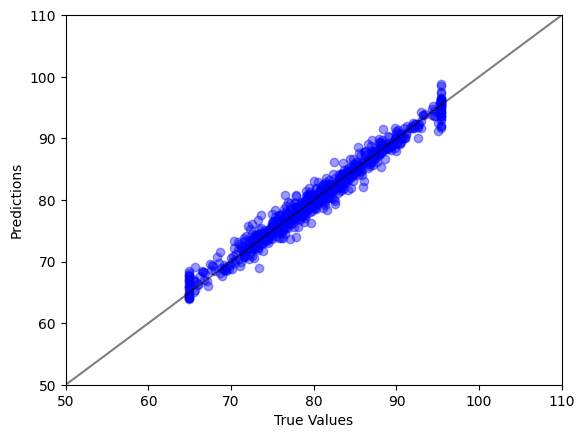

In [56]:
p_test = regr.predict(test.drop(columns=['lifespan']))

plt.scatter(test['lifespan'],p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

In [57]:
p_test

array([78.71293611, 68.55063764, 78.89160594, 94.71225605, 78.14958292,
       79.58367567, 82.43772104, 82.17906487, 72.62909314, 72.93054721,
       85.0154548 , 76.16886619, 77.55655959, 79.83582609, 77.32643938,
       80.2007189 , 82.08093108, 78.55909184, 76.92273481, 78.46075093,
       79.62253987, 95.38680865, 88.63885602, 95.02512131, 80.76776038,
       72.8851947 , 80.40665677, 85.14250814, 78.32320449, 78.6508132 ,
       80.97699339, 81.19994853, 79.99248126, 93.5638833 , 80.82791131,
       83.73678296, 85.29744504, 77.74566504, 80.8544789 , 89.01473642,
       81.7484525 , 75.08589135, 66.76540828, 77.93928163, 81.97620038,
       73.61647927, 75.6930501 , 90.10465806, 78.3436071 , 72.86927248,
       66.03365984, 96.49794738, 82.5353939 , 82.70931005, 68.82576016,
       81.40376467, 79.84314992, 67.2111676 , 79.23555719, 93.93429628,
       74.93283981, 81.47374311, 85.44419   , 78.88349746, 67.67684273,
       82.45837093, 81.37387093, 84.54339981, 78.72399635, 73.98

In [61]:
print('Mean Absolute Error:', mean_absolute_error( test['lifespan'], p_test))
print('Mean Squared Error:', mean_squared_error(test['lifespan'], p_test))
import math
print('Mean Root Squared Error:', math.sqrt(mean_squared_error(test['lifespan'], p_test)))

Mean Absolute Error: 0.8930818051974404
Mean Squared Error: 1.4422412305684023
Mean Root Squared Error: 1.2009334829907952
